In [47]:
with open('wizard.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#this prints the length of the text
print(len(text))

232309


In [48]:
print(text[:200])

﻿  DOROTHY AND THE WIZARD IN OZ

  BY

  L. FRANK BAUM

  AUTHOR OF THE WIZARD OF OZ, THE LAND OF OZ, OZMA OF OZ, ETC.

  ILLUSTRATED BY JOHN R. NEILL

  BOOKS OF WONDER WILLIAM MORROW & CO., INC. NEW


In [49]:
#All the charcters that we have
chars = sorted(set(text))
print(chars)

['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\ufeff']


In [50]:
vocab_size = len(chars)

Now we will make an ecoder and a decoder.
This is a character level tokenizer which takes each charcater and converts it to an integer.
We have small vocab but large amount of tokens to be converted.

If we work with word level tokenizer then it would be trillions of tokens. Large vocab but small tokens.

Sub-word tokenizer is hybrid of both



In [51]:
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

In [12]:
print(encode('Hassan'))

[32, 54, 72, 72, 54, 67]


In [13]:
print(decode([32, 54, 72, 72, 54, 67]))

Hassan


In [53]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Some cool stuff you can do with pytorch so you know
what it is actually used for


In [52]:
import torch.nn as nn
from torch.nn import functional as F
import numpy as np
import time

In [23]:
%%time
start_time = time.time()
# matrix operations here
zeros = torch.zeros(1, 1)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time:.8f}")


0.00647211
CPU times: user 1.75 ms, sys: 0 ns, total: 1.75 ms
Wall time: 6.6 ms


In [24]:
randint=torch.randint(-100,100,(2,))
print(randint)

tensor([ 24, -71])


In [27]:
tensor=torch.tensor([[1,2],[3,4],[5,6]])
print(tensor)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [28]:
input=torch.empty(2,2)
print(input)

tensor([[2.1715e-18, 2.3081e-12],
        [1.8590e+34, 7.7767e+31]])


In [30]:
arange=torch.arange(5)
print(arange)

tensor([0, 1, 2, 3, 4])


In [31]:
linspace=torch.linspace(3,10,steps=5)
print(linspace)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])


In [32]:
eye=torch.eye(5)
print(eye)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


CPU PERFORMS BETTER THAN GPU ON SIMPLE SHAPES


In [33]:
torch_rand1 = torch.rand(100, 100, 100, 100).to(device)
torch_rand2 = torch.rand(100, 100, 100, 100).to(device)
np_rand1 = torch.rand(100, 100, 100, 100)
np_rand2 = torch.rand(100, 100, 100, 100)

start_time = time.time()

rand = (torch_rand1 @ torch_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time:.8f}")


start_time = time.time()

rand = np.multiply(np_rand1, np_rand2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"{elapsed_time:.8f}")


0.78064680
0.49890327


In [36]:
# Define a probability tensor
probabilities = torch.tensor([0.1, 0.9])
# 10% chance of getting a zero, 90% chance for getting a 1. each probability points to the index of the probability in the tensor
# Draw 5 samples from the multinomial distribution
samples = torch.multinomial(probabilities, num_samples=10, replacement=True)
print(samples)

tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])


In [38]:
#concatenate 2 sensors into one (used in text generation)
tensor = torch.tensor([1, 2, 3, 4])
out = torch.cat((tensor, torch.tensor([5])), dim=0)
out

tensor([1, 2, 3, 4, 5])

In [39]:
#lower triangle
out = torch.tril(torch.ones(5, 5))
out

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [40]:
#upper triangle
out = torch.triu(torch.ones(5, 5))
out

tensor([[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]])

Moving from negative infinity to 0, then 0 to 1


In [41]:
out = torch.zeros(5, 5).masked_fill(torch.tril(torch.ones(5, 5)) == 0, float('-inf'))
out

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [42]:
torch.exp(out)


tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [43]:
input = torch.zeros(2, 3, 4)
out1 = input.transpose(0, 1)
out2 = input.transpose(-2,-1)
print(out1.shape)
print(out2.shape)
# torch.permute works the same but you provide the new order of dimensions instead of the dimensions you'd like to swap.


torch.Size([3, 2, 4])
torch.Size([2, 4, 3])


In [46]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])
tensor3 = torch.tensor([7, 8, 9])

# Stack the tensors increase the dimension
stacked_tensor = torch.stack([tensor1, tensor2, tensor3])
stacked_tensor


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [48]:
import torch.nn as nn
sample = torch.tensor([10.,10.,10.])
linear = nn.Linear(3, 3, bias=False)
print(linear(sample))
#learns weight and bias to become better and better the nn module

tensor([ 3.7114, -4.7357, -6.4906], grad_fn=<SqueezeBackward4>)


Softmax converts vector to probabilities


In [47]:
import torch.nn.functional as F

# Create a tensor
tensor1 = torch.tensor([1.0, 2.0, 3.0])

# Apply softmax using torch.nn.functional.softmax()
softmax_output = F.softmax(tensor1, dim=0)

print(softmax_output)

tensor([0.0900, 0.2447, 0.6652])


N dot embedding is a technique for creating dense vector representations of graphs by multiplying node features and adjacency matrices, capturing relationships between nodes in a low-dimensional space.

In [3]:
# Initialize an embedding layer
vocab_size = 80
embedding_dim = 6
embedding = nn.Embedding(vocab_size, embedding_dim)

# Create some input indices
input_indices = torch.LongTensor([1, 5, 3, 2])

# Apply the embedding layer
embedded_output = embedding(input_indices)

# The output will be a tensor of shape (4, 100), where 4 is the number of inputs
# and 100 is the dimensionality of the embedding vectors
print(embedded_output.shape)
print(embedded_output)


torch.Size([4, 6])
tensor([[-0.1584,  0.1968, -1.0232,  0.3752,  0.0413,  0.8819],
        [-0.3506,  1.5185,  1.7786, -1.1053,  1.5372, -0.9425],
        [ 0.3410,  1.8148,  0.3019, -2.0920,  1.1490,  0.0686],
        [ 0.2256,  0.3709,  0.8330,  1.5623, -0.7798, -1.1359]],
       grad_fn=<EmbeddingBackward0>)


In [6]:
a = torch.tensor([[1,2],[3,4],[5,6]])
b = torch.tensor([[7,8,9],[10,11,12]])
print(torch.matmul(a, b))

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


In [5]:
print(a @ b)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


In [11]:
int_64 = torch.randint(1, (3, 2)).float()
#type int64
float_32 = torch.rand(2,3)
#type float32
print(int_64.dtype, float_32.dtype)
result = torch.matmul(int_64, float_32)
print(result)


torch.float32 torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [12]:
a = torch.rand(2, 3, 5)
print(a.shape)
x, y, z = a.shape
a = a.view(x,y,z)
print(x, y, z)
print(a.shape)


torch.Size([2, 3, 5])
2 3 5
torch.Size([2, 3, 5])


In [9]:
input = torch.rand((4, 8, 10))
B, T, C = input.shape
output = input.view(B*T, C)
print(output)


tensor([[3.2524e-01, 9.8585e-01, 1.5053e-01, 8.9909e-01, 8.4300e-01, 3.0315e-01,
         5.5907e-01, 6.7589e-01, 5.5715e-01, 9.7738e-01],
        [4.1786e-01, 2.1381e-01, 7.2197e-01, 6.1850e-01, 4.5625e-01, 2.2868e-01,
         6.2862e-01, 2.8456e-01, 1.3787e-01, 9.8428e-01],
        [2.4788e-02, 7.9113e-01, 2.1766e-01, 9.1055e-01, 5.2625e-01, 7.8529e-01,
         5.0509e-01, 3.0529e-01, 4.4163e-01, 5.3367e-01],
        [6.9818e-02, 5.5024e-01, 3.7500e-01, 2.6505e-01, 4.1752e-01, 1.1815e-01,
         6.4608e-01, 3.6248e-01, 3.2193e-01, 5.6960e-01],
        [8.4866e-01, 5.5627e-01, 4.3618e-01, 6.4134e-01, 8.6616e-01, 7.4590e-01,
         2.7461e-01, 2.5123e-01, 3.8373e-01, 4.6747e-01],
        [5.2740e-01, 7.2638e-01, 8.5942e-02, 7.6404e-01, 3.1775e-02, 4.2702e-01,
         5.7284e-02, 5.0026e-01, 9.2847e-01, 7.6994e-01],
        [9.2690e-01, 1.7754e-01, 2.1889e-01, 8.6953e-02, 7.9939e-01, 6.1113e-01,
         2.1477e-01, 5.4953e-02, 4.7217e-01, 8.1402e-01],
        [9.4501e-01, 8.6053

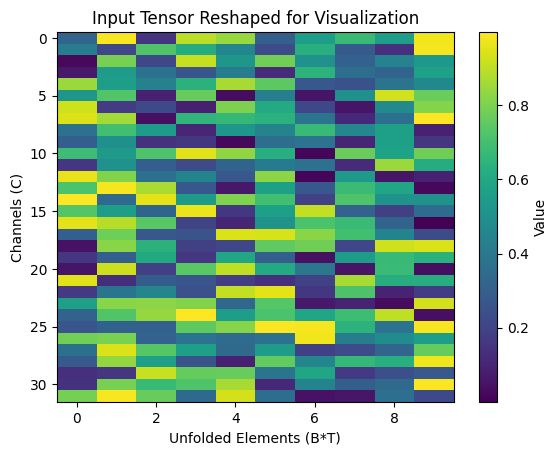

In [15]:
import matplotlib.pyplot as plt

# Create a heatmap to visualize the transformation (channels vs unfolded elements)
plt.imshow(output.detach().cpu(), aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Unfolded Elements (B*T)')
plt.ylabel('Channels (C)')
plt.title('Input Tensor Reshaped for Visualization')
plt.show()

In [13]:
x = torch.tensor([10], dtype=torch.float32)
y = F.tanh(x)
print(y)

tensor([1.])



**Back to our working code**

Define the block,batch size etc



In [54]:
block_size = 8
batch_size = 4
max_iters = 1000
# eval_interval = 2500
learning_rate = 3e-4
eval_iters = 250

In [55]:
#encode the whole txt file data we have
data = torch.tensor(encode(text), dtype=torch.long)

In [56]:
print(data[:50])

tensor([80,  1,  1, 28, 39, 42, 39, 44, 32, 49,  1, 25, 38, 28,  1, 44, 32, 29,
         1, 47, 33, 50, 25, 42, 28,  1, 33, 38,  1, 39, 50,  0,  0,  1,  1, 26,
        49,  0,  0,  1,  1, 36, 11,  1, 30, 42, 25, 38, 35,  1])


Split the data to make the generations unique.
Pick a random block size(encoded characters) to make predictions.

In [57]:
n = int(0.8*len(data))
train_data = data[:n]
val_data = data[n:]

In [19]:
block_size=8
x=train_data[:block_size]
y=val_data[1:block_size+1]

for t in range (block_size):
  context = x[:t+1]
  target = y[t]
  print(f"when input is {context} the target is {target}")

when input is tensor([80]) the target is 54
when input is tensor([80,  1]) the target is 73
when input is tensor([80,  1,  1]) the target is 73
when input is tensor([80,  1,  1, 28]) the target is 58
when input is tensor([80,  1,  1, 28, 39]) the target is 71
when input is tensor([80,  1,  1, 28, 39, 42]) the target is 9
when input is tensor([80,  1,  1, 28, 39, 42, 39]) the target is 1
when input is tensor([80,  1,  1, 28, 39, 42, 39, 44]) the target is 76


In [58]:
def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

x, y = get_batch('train')
print('inputs:')
print(x)
print('targets:')
print(y)


inputs:
tensor([[58, 71,  1, 76, 54, 71, 67, 62],
        [62, 71,  1, 54, 59, 73, 58, 71],
        [68, 59,  1, 73, 61, 62, 72,  1],
        [60,  1, 61, 62, 72,  1, 61, 58]], device='cuda:0')
targets:
tensor([[71,  1, 76, 54, 71, 67, 62, 67],
        [71,  1, 54, 59, 73, 58, 71,  1],
        [59,  1, 73, 61, 62, 72,  1, 56],
        [ 1, 61, 62, 72,  1, 61, 58, 54]], device='cuda:0')


In [59]:
print(x.shape)


torch.Size([4, 8])


In [65]:
#we dont need any computation or gradiemt optimization here because we are only reorting loss
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


The class takes the nn dot module.

self.token_embedding_table creates a lookup table called token_embedding_table. It's a core component of the model that maps each word in your vocabulary to a numerical vector (embedding). This vector captures some meaning or representation of the word.




In [61]:
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, index, targets=None):
        logits = self.token_embedding_table(index)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            #looks up the embeddings for each word index in index using the token_embedding_table.
            #logits are probability distrinution of what we want to predict
            #view help us reshape how logits look like
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, index, max_new_tokens):
        # index is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self.forward(index)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            index_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            index = torch.cat((index, index_next), dim=1) # (B, T+1)
        return index

model = BigramLanguageModel(vocab_size)
m = model.to(device)


In [62]:
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_chars = decode(m.generate(context, max_new_tokens=500)[0].tolist())
print(generated_chars)


G!vcyMmxMZE_T 5]pYCxsRl Zv"!4:]k2KQlh5MHNZab:kI"jKc_ 'BMPwvv_ZjgkM7gynbp9X1w0kgwN!Sm_OK]Mm tNfjkI.?f;(""f,2a-_Qma01"3vG?(&dzf"HGcpH7c5reM]*sH6Wjgj&Fnxnf20dGTi_ZExC_k]u]uJqC1A_hFpsHEv1Zx*,gB]
vMlKEBS]*&'BLiDZahnLdORh3h64﻿[dwb1RTN2uOMPZ?&5JZMFnF9EhN,exCV]TBiA_(.2)6TiB;v "yH'jlGW!L'p;7r*_WbiA?&X1VPF8qkV1VluX45Pwe5?ITFl:yISf6Td)g5,lOK﻿Pe]KmYI;i?di
fywRJ'JDGksbi)aP Uq,U(trJ)QFXxAm!8ngRqQmMLH6r6yISEBsra(y25 c"P!pPsDf6LntJHF-f8K2(s'*QHIOqyMexGH;6L))6T6K Zy!vGMSExALl﻿tgLN05cN!pz-rMz7CpaagAL*cpy9y'2ktcpn


In [63]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    if iter % eval_iters == 0:
        losses = estimate_loss()
        print(f"step: {iter}, train loss: {losses['train']:.3f}, val loss: {losses['val']:.3f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model.forward(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
print(loss.item())


step: 0, train loss: 4.828, val loss: 4.830
step: 250, train loss: 4.780, val loss: 4.788
step: 500, train loss: 4.720, val loss: 4.709
step: 750, train loss: 4.648, val loss: 4.657
4.7332587242126465


In [64]:
context = torch.zeros((1,1), dtype=torch.long, device=device)
generated_chars = decode(m.generate(context, max_new_tokens=500)[0].tolist())
print(generated_chars)


ksRJGMm'O'gh::205,tt0EnlImz,)C7pYDp0Hgm PreOu&SfP1[4IpCVnp
?ID!Sb_uDZ(q,8GpaYU6g-VmaYq8X6Wq9*T3shosHF9C]pWuXwkIS[6q-"yuG7;6-"?ODR*z,OKA?wN'a0Y:R)Uqz Ke&iOPEhN_06igahZ
(G.bDwvnpB1NbLqTkiA:d0qWu?ha]m!c?lD]cpsr9tgqSqks;XBSbaw6qCB*pYy cpYZ5?,4n[QtH;TWb)A8vmGb. P;mi4 FF!)yOTT-Ivfo-Ma&XhK];wkNQF*QHqsJGQ&)D3fy".2wJ1ADZ7EzynP65f6b6WU2wX_ZYF9_ubmF;6T6Pg8nX4n[uCG0QmMITx8"y[v1AbyMAF&Six[7
'﻿JDN5NO)qNZ05JqSYIVz6&&)vLD﻿_kBvLK[nb1MLE2maP.6KmxM"y6IT-TkL]9fbuhx1m,6.3E2e-!cH[﻿2iR06)w)zlG?5Md!iLD,
NQCVU2zHr;XH6FF
